<a href="https://colab.research.google.com/github/veerendrabotla/datamining/blob/main/boston_house_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import normalize

In [2]:
(x_train,y_train),(x_test,y_test)=boston_housing.load_data()


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='mse')

In [19]:
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 593.7859 - val_loss: 562.7558
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 517.2446 - val_loss: 488.2961
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 458.3152 - val_loss: 384.1371
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 320.5811 - val_loss: 256.4900
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 213.0188 - val_loss: 136.0604
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 109.5681 - val_loss: 75.7577
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.8697 - val_loss: 54.1673
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.0522 - val_loss: 40.7611
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.9901 - val_loss: 33.8033
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.4762 - val_loss: 30.6887
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.2790 - val_loss: 28.2614
Epoch 12/100
13/13 ━━━━━━━━━━

In [21]:
test_loss = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.4815
Test loss: 18.309890747070312


In [22]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Mean Absolute Error: 2.6947239342857814


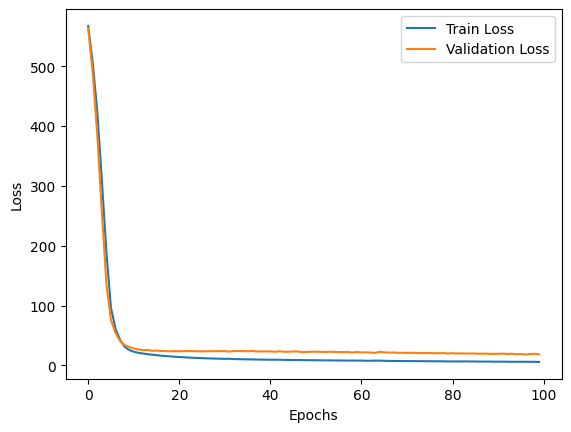

In [23]:
#Plot training and validation losses
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()